<a href="https://colab.research.google.com/github/gio-bis/MLPNS2021/blob/main/CART/HiggsBoson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import json
import os
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
pip install kaggle

In [4]:
cd /content/drive/My Drive

/content/drive/My Drive


In [5]:
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [6]:
!mkdir higgsb

mkdir: cannot create directory ‘higgsb’: File exists


In [7]:
cd higgsb/


/content/drive/My Drive/higgsb


In [8]:
!pwd

/content/drive/My Drive/higgsb


In [9]:
!kaggle competitions download -c higgs-boson

random_submission.zip: Skipping, found more recently modified local copy (use --force to force download)
HiggsBosonCompetition_AMSMetric_rev1.py: Skipping, found more recently modified local copy (use --force to force download)
test.zip: Skipping, found more recently modified local copy (use --force to force download)
training.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
!unzip test.zip 
!unzip training.zip

Archive:  test.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
Archive:  training.zip
replace training.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: training.csv            


In [11]:
data = pd.read_csv("training.csv")

In [12]:
data.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [13]:
data.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,1.437609,-0.128305,-708.985189,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,0.844743,1.193585,453.596721,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,-999.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,0.883000,-1.371000,-999.000000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,1.280000,-0.356000,-999.000000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,1.777000,1.225000,0.000000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [14]:
data.shape

(250000, 33)

In [15]:
data.isna().sum() 

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

I -999.000 vanno sostituiti con NaN

In [16]:
data = data.replace(to_replace=-999.000, value=np.nan)

In [17]:
data.isna().sum()

EventId                             0
DER_mass_MMC                    38114
DER_mass_transverse_met_lep         0
DER_mass_vis                        0
DER_pt_h                            0
DER_deltaeta_jet_jet           177457
DER_mass_jet_jet               177457
DER_prodeta_jet_jet            177457
DER_deltar_tau_lep                  0
DER_pt_tot                          0
DER_sum_pt                          0
DER_pt_ratio_lep_tau                0
DER_met_phi_centrality              0
DER_lep_eta_centrality         177457
PRI_tau_pt                          0
PRI_tau_eta                         0
PRI_tau_phi                         0
PRI_lep_pt                          0
PRI_lep_eta                         0
PRI_lep_phi                         0
PRI_met                             0
PRI_met_phi                         0
PRI_met_sumet                       0
PRI_jet_num                         0
PRI_jet_leading_pt              99913
PRI_jet_leading_eta             99913
PRI_jet_lead

In [18]:
data = data.dropna(axis=1)

In [19]:
data.shape

(250000, 22)

In [20]:
labels = data[["Label"]]
ranks = data[["Weight"]]

In [21]:
from sklearn.model_selection import train_test_split 
#split arrays or matrices into random train and test subsets 

In [22]:
#note: take data from col 1 thtough -2 as features: remove ColumnId and target variables
traindata, testdata, train_label, test_label = train_test_split(data[data.columns[1:-2]],
                                labels, train_size=0.75, test_size=0.25, random_state=1)

Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.

In [23]:
from sklearn import ensemble
rf =  ensemble.RandomForestClassifier(random_state = 0).fit(traindata, train_label)
print ("score %f"%rf.score(traindata, train_label))
print ("score %f"%rf.score(testdata, test_label))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


score 0.999984
score 0.826576


In [24]:
gbt = ensemble.GradientBoostingClassifier(random_state = 0).fit(traindata, train_label)
print ("score %f"%gbt.score(traindata, train_label))
print ("score %f"%gbt.score(testdata, test_label))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score 0.820555
score 0.817440


The RF is better on the training data, but it is an illusion. it is overfitting as is evident by the fact that the performance is inferior on the test data than on the training data. GBT performs just as well on the testing data without overfitting

#Produce a confusion matrix for each model and compare them

In [25]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred,
                          normalize=True,
                          title='',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """         
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    
    pl.imshow(cm, cmap="bone")
    pl.text(0,0, "%d"%cm[0][0])
    pl.text(1,1, "%d"%cm[1][1])
    pl.text(0,1, "%d"%cm[1][0], color="w", ha="center")
    pl.text(1,0, "%d"%cm[0][1], color="w", ha="center")
    pl.xticks([0,1], labels=["N", "P"])
    pl.yticks([0,1], labels=["N", "P"])
    pl.title(title)
    pl.colorbar()
   

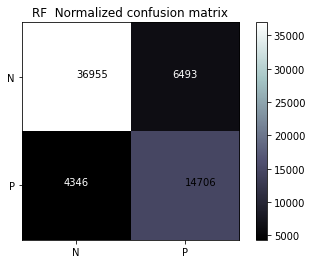

In [26]:
plot_confusion_matrix(rf.predict(testdata), test_label,
                      title="RF ")
#The higher the diagonal values of the confusion matrix the better, 
#indicating many correct predictions

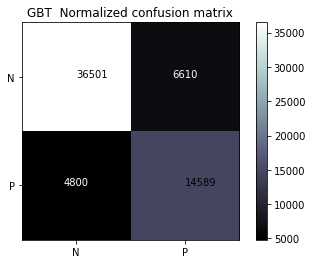

In [27]:
plot_confusion_matrix(gbt.predict(testdata), 
                      test_label,
                      title="GBT ")

similar performance for both models

thousands of  False poisitves and False negatives is clearly bad! the accuracy is dominated by the class imbalance, but the rare events may be missed!

Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test sets

In [28]:
traindata2, testdata2, train_weight, test_weight = train_test_split(data[data.columns[1:-2]],
                                ranks, train_size=0.75, test_size=0.25, random_state=1)

In [29]:
from sklearn import ensemble
rf2 = ensemble.RandomForestRegressor(n_estimators=100, max_depth=3,
                                     random_state=0)
rf2.fit(traindata2, train_weight)
print(rf2.feature_importances_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[0.34215823 0.         0.05086311 0.         0.00755318 0.0176836
 0.         0.         0.02206185 0.         0.         0.
 0.         0.         0.         0.         0.         0.04790643
 0.5117736 ]


In [30]:
print(rf2.score)

<bound method RegressorMixin.score of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)>


In [31]:
rf2.predict(testdata2)

array([1.0416461 , 0.93019922, 1.92966471, ..., 0.43503809, 1.97828446,
       2.83394082])

In [32]:
from sklearn.ensemble import GradientBoostingRegressor 
gbt2 = GradientBoostingRegressor(random_state=0)
gbt2.fit(traindata2, train_weight)  
print(gbt2.feature_importances_)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2.92550018e-01 6.67362679e-02 4.55961519e-02 2.95793221e-02
 1.25082539e-02 9.71070434e-02 6.86037362e-03 4.84976968e-02
 6.30954667e-02 1.44357188e-03 0.00000000e+00 2.09665144e-04
 2.02500138e-03 0.00000000e+00 5.11620295e-03 0.00000000e+00
 3.43472152e-02 1.20425610e-02 2.82285188e-01]


In [33]:
print("RF score from sklearn {:.1f}".format(rf2.score(testdata2, test_weight.values)))

RF score from sklearn 0.5


In [34]:
print("GBT score from sklearn {:.1f}".format(gbt2.score(testdata2, test_weight.values)))

GBT score from sklearn 0.6


In [35]:
rf.predict(testdata)

array(['s', 'b', 's', ..., 's', 'b', 'b'], dtype=object)

In [42]:
rf.feature_importances_

array([0.1254734 , 0.13046129, 0.04910408, 0.07476513, 0.0386615 ,
       0.0426589 , 0.05626757, 0.07477338, 0.07230136, 0.03281533,
       0.03055287, 0.0365108 , 0.03493177, 0.03030776, 0.06658211,
       0.03037803, 0.03595682, 0.0094732 , 0.02802472])

In [45]:
np.argsort(rf.feature_importances_)

array([17, 18, 13, 15, 10,  9, 12, 16, 11,  4,  5,  2,  6, 14,  8,  3,  7,
        0,  1])

In [44]:
np.argsort(rf.feature_importances_)[-4:] 

array([3, 7, 0, 1])

In [46]:
best_features = rf.feature_importances_[np.argsort(rf.feature_importances_)[-4:]]
best_features
#prendo gli ultimi 4 che sono
#quelli più grandi, quindi the best features 

array([0.07476513, 0.07477338, 0.1254734 , 0.13046129])

In [51]:
traindata2.iloc[:, best_features]

,DER_mass_transverse_met_lep,DER_mass_transverse_met_lep,DER_mass_transverse_met_lep,DER_mass_transverse_met_lep
168601,78.176,78.176,78.176,78.176
247644,51.736,51.736,51.736,51.736
205247,54.941,54.941,54.941,54.941
233035,47.390,47.390,47.390,47.390
239886,84.896,84.896,84.896,84.896
...,...,...,...,...
229119,41.162,41.162,41.162,41.162
5192,18.385,18.385,18.385,18.385
208780,70.622,70.622,70.622,70.622
229611,29.671,29.671,29.671,29.671


In [53]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Number of trees in random forest
n_estimators = [10,100,1000]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [3,10,100]
max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
##min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf,
               #'bootstrap': bootstrap
               }
print(random_grid)


{'n_estimators': [10, 100, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 10, 100, None]}


In [55]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# n_iter is the sampling along each axis, and use all available cores
random_search = RandomizedSearchCV(
    estimator = rf, param_distributions=random_grid, random_state=123, verbose=3,
                                   n_iter=15, cv=4, iid=False, n_jobs=-1)

In [73]:
pwd

'/content/drive/My Drive/higgsb'